# Перцептрон для восприятия цифр
__Суммарное количество баллов: 10__

В этом задании вам предстоит реализовать классический перцептрон, немного улчшить его, и протестировать результат на классической задаче определния цифр по изображениям.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
def visualize(X, labels_true, labels_pred, w):
    unique_labels = np.unique(labels_true)
    unique_colors = dict([(l, c) for l, c in zip(unique_labels, [[0.8, 0., 0.], [0., 0., 0.8]])])
    plt.figure(figsize=(9, 9))

    if w[1] == 0:
        plt.plot([X[:, 0].min(), X[:, 0].max()], w[0] / w[2])
    elif w[2] == 0:
        plt.plot(w[0] / w[1], [X[:, 1].min(), X[:, 1].max()])  
    else:
        mins, maxs = X.min(axis=0), X.max(axis=0)
        pts = [[mins[0], -mins[0] * w[1] / w[2] - w[0] / w[2]],
               [maxs[0], -maxs[0] * w[1] / w[2] - w[0] / w[2]],
               [-mins[1] * w[2] / w[1] - w[0] / w[1], mins[1]],
               [-maxs[1] * w[2] / w[1] - w[0] / w[1], maxs[1]]]
        pts = [(x, y) for x, y in pts if mins[0] <= x <= maxs[0] and mins[1] <= y <= maxs[1]]
        x, y = list(zip(*pts))
        plt.plot(x, y, c=(0.75, 0.75, 0.75), linestyle="--")
    
    colors_inner = [unique_colors[l] for l in labels_true]
    colors_outer = [unique_colors[l] for l in labels_pred]
    plt.scatter(X[:, 0], X[:, 1], c=colors_inner, edgecolors=colors_outer)
    plt.show()

### Задание 1 (3 балла)
Для начала реализуем простой перцептрон.

#### Методы
`predict(X)` - возвращает предсказанные метки для элементов выборки `X`

`fit(X, y)` - инициализирует веса перцептрона нулями, а затем обновляет их в течении `iterations` итераций. Обновление происходит следующим образом: $w_{t+1} = w_t + \sum_{y_i: \text{sign}(x_i w) \neq y_i} y_i \cdot x_i$.

Гарантируется, что в обучающей и тестовой выборках всего два класса. Обратите внимание, что метки классов в обучающей выборке могут быть любыми.

#### Параметры конструктора
`iterations` - количество итераций обучения перцептрона

#### Поля
`w` - веса перцептрона размерности `X.shape[1] + 1`. `w[0]` должен соответстовать константе, `w[1:]` - коэффициентам компонент элемента `X`.

#### Тесты
Есть две группы тестов:
1. Линейно разделимые данные с равным количеством точек в каждом классе. Всего 20 тестов по 150 точек в train и 50 точек в test.
2. Линейно разделимые данные с неравным еоличеством точек в каждом классе. Всего 20 тестов по 150 точек в train и 50 точек в test.

Количество итераций на каждом из тестов равно `20000`, а размерность пространства не превышает `16`.

In [3]:
from task import Perceptron

Посмотрим на то, как наш перцептрон справляется с различными наборами данных

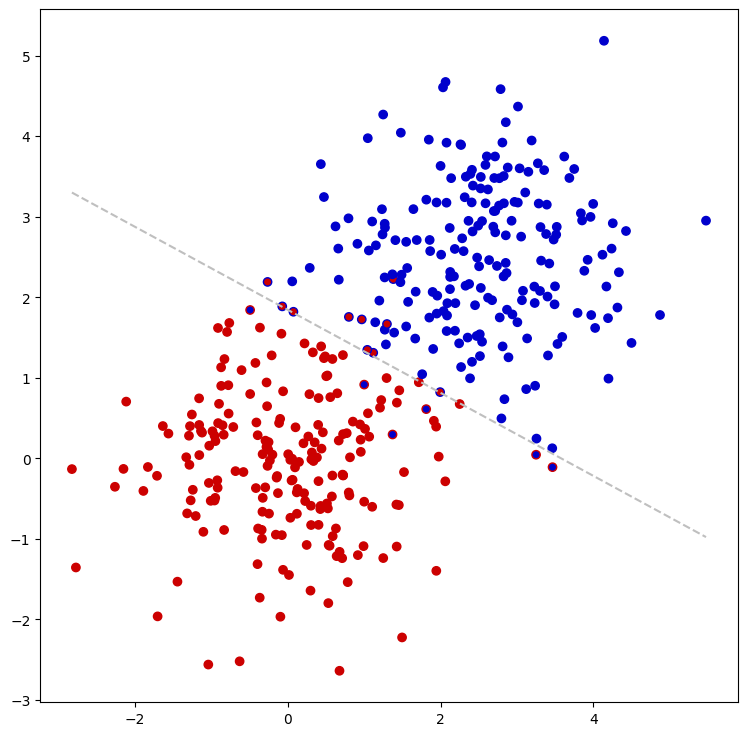

In [4]:
X, true_labels = make_blobs(400, 2, centers=[[0, 0], [2.5, 2.5]])
c = Perceptron()
c.fit(X, true_labels)
visualize(X, true_labels, np.array(c.predict(X)), c.w)

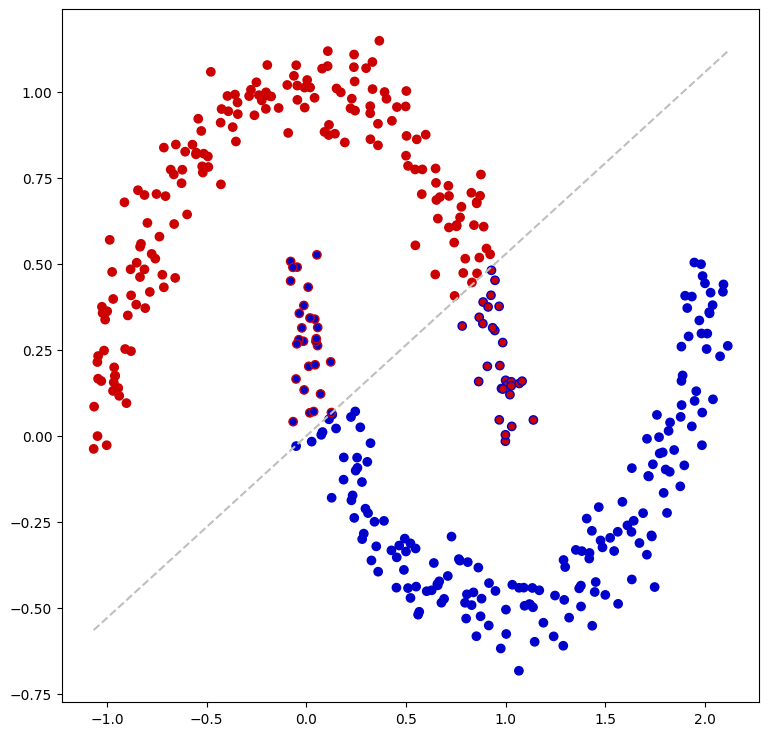

In [5]:
X, true_labels = make_moons(400, noise=0.075)
c = Perceptron()
c.fit(X, true_labels)
visualize(X, true_labels, np.array(c.predict(X)), c.w)

### Задание 2 (2 балла)
Проблема обычной реализации перцептрона в том, что закончить его обучение мы можем с неоптимальными весами, т.к. точность разбиения в зависимости от числа итераций не растет монотонно. Чтобы этого избежать, мы можем оставлять в конце веса той итерации, на которой мы лучше всего разбивали множество `X`.

#### Методы
`predict(X)` - возвращает предсказанные метки для элементов выборки `X`

`fit(X, y)` -  - инициализирует веса перцептрона нулями, а затем обновляет их в течении `iterations` итераций. Обновление происходит следующим образом: $w_{t+1} = w_t + \sum_{y_i: \text{sign}(x_i w) \neq y_i} y_i \cdot x_i$. В конце обучения оставляет веса, которые классифицируют train выборку лучше всего. Обратите внимание: для сохранения лучших весов следует использовать `np.copy`

Гарантируется, что в обучающей и тестовой выборках всего два класса. Обратите внимание, что метки классов в обучающей выборке могут быть любыми.

#### Параметры конструктора
`iterations` - количество итераций обучения перцептрона

#### Поля
`w` - веса перцептрона размерности `X.shape[1] + 1`. `w[0]` должен соответстовать константе, `w[1:]` - коэффициентам компонент элемента `X`.

#### Тесты
Есть две группы тестов:
1. Линейно разделимые данные с неравным еоличеством точек в каждом классе. Всего 20 тестов по 200 точек в train и 100 точек в test.
2. Линейно неразделимые данные с outlier'ами. Всего 20 тестов по 400 точек в train и 100 точек в test.

Количество итераций на каждом из тестов равно `20000`, а размерность пространства не превышает `16`.

In [10]:
from task import PerceptronBest

Посмотрим на то, как наш перцептрон справляется с различными наборами данных

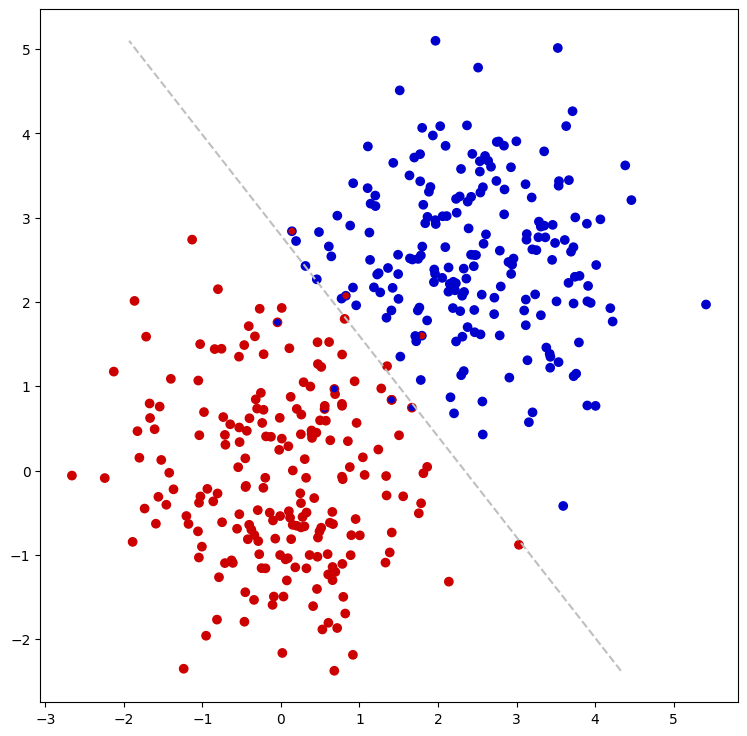

In [27]:
X, true_labels = make_blobs(400, 2, centers=[[0, 0], [2.5, 2.5]])
c = PerceptronBest(iterations=20000)
c.fit(X, true_labels)
visualize(X, true_labels, np.array(c.predict(X)), c.w)

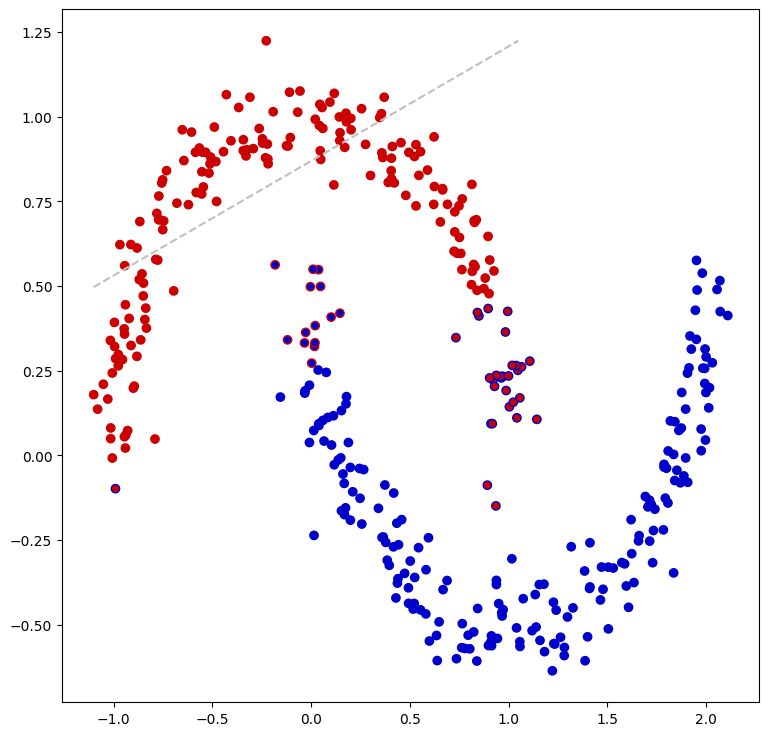

In [8]:
X, true_labels = make_moons(400, noise=0.075)
c = PerceptronBest(iterations=20000)
c.fit(X, true_labels)
visualize(X, true_labels, np.array(c.predict(X)), c.w)

### Задание 3 (1 балл)
Реализуйте метод `transform_images(images)`, который преобразует изображения в двумерные векторы. Значение компонент векторов придумайте сами и напишите в виде комментария к методу.

In [11]:
from task import transform_images

def get_digits(y0=1, y1=5):
    data = datasets.load_digits()
    images, labels = data.images, data.target
    mask = np.logical_or(labels == y0, labels == y1)
    labels = labels[mask]
    images = images[mask]
    images /= np.max(images)
    X = transform_images(images)
    return X, labels

In [18]:
def extract_features(images):
    # images - это 3D массив размером (число изображений, 8, 8)
    
    # Признак 1: максимальная длина вертикальной непрерывной полосы "1" по каждому столбцу
    vertical_streaks = np.max([np.max(np.diff(np.where(np.pad(image, ((0, 0), (1, 1)), mode='constant') == 1, axis=1), axis=1) - 1, axis=1) for image in images], axis=1)
    
    # Признак 2: длина верхнего хвоста - максимальная длина непрерывной "1" в первой строке
    top_tail = np.array([np.max(np.diff(np.where(np.pad(image[0], (1, 1), mode='constant') == 1)) - 1) for image in images])
    
    # Объединяем признаки в одну матрицу (число изображений, 2)
    features = np.stack((vertical_streaks, top_tail), axis=1)
    
    return features
d = datasets.load_digits()
images = d.images[np.where(d.target == 1, True, False)]
extract_features(images)

TypeError: where() got an unexpected keyword argument 'axis'

In [18]:
d = datasets.load_digits()
images = d.images[np.where(d.target == 1, True, False)]
height, width = images.shape[1:]
center = images[:, :, width // 2] > images[images > 0].mean()
up = images[:, 1, :]  > images[images > 0].mean()
max_center = []
max_up = []
for image in center:
    diff = np.diff(np.concatenate(([0], image.astype(int), [0])))
    starts = np.where(diff == 1)[0]
    ends = np.where(diff == -1)[0]
    lengths = ends - starts
    max_center.append(np.max(lengths) if lengths.size > 0 else 0)
for image in up:
    diff = np.diff(np.concatenate(([0], image.astype(int), [0])))
    starts = np.where(diff == 1)[0]
    ends = np.where(diff == -1)[0]
    lengths = ends - starts
    max_up.append(np.max(lengths) if lengths.size > 0 else 0)
np.hstack((np.array(max_center)[:, np.newaxis], np.array(max_up)[:, np.newaxis]))

array([[8, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 1],
       [8, 2],
       [6, 2],
       [2, 2],
       [6, 2],
       [2, 1],
       [8, 2],
       [4, 2],
       [8, 2],
       [8, 2],
       [6, 2],
       [6, 2],
       [3, 2],
       [8, 2],
       [8, 2],
       [7, 3],
       [5, 2],
       [8, 2],
       [8, 2],
       [7, 3],
       [7, 2],
       [7, 2],
       [8, 2],
       [8, 2],
       [6, 2],
       [8, 2],
       [7, 2],
       [8, 2],
       [3, 3],
       [8, 3],
       [8, 3],
       [8, 3],
       [8, 2],
       [8, 2],
       [4, 1],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 3],
       [8, 3],
       [8, 3],
       [5, 1],
       [3, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [3, 1],
       [4, 1],
       [3, 1],
       [6, 1],
       [2, 1],
       [6, 1],
       [8, 2],
       [6, 2],
       [6, 3],
       [8,

In [19]:
np.min(np.sum(images[:, :2, :] > images[images > 0].mean(), axis=2), axis=1)

array([2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1,
       0, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0,
       2, 2, 3, 2, 2, 1, 2, 3, 4, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 2, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 2, 0, 1, 2,
       2, 1, 2, 1, 2, 2])

In [20]:
np.max(np.sum(images >= images.max(), axis=1), axis=1)

array([7, 6, 7, 6, 6, 6, 6, 6, 7, 5, 8, 6, 2, 6, 5, 3, 8, 6, 6, 5, 6, 3,
       7, 6, 7, 7, 6, 6, 6, 6, 6, 4, 6, 4, 6, 7, 6, 5, 7, 7, 7, 6, 6, 7,
       4, 7, 7, 7, 6, 8, 7, 7, 4, 3, 5, 5, 5, 5, 3, 4, 4, 4, 4, 8, 5, 6,
       7, 7, 6, 6, 7, 6, 7, 5, 8, 6, 6, 5, 4, 7, 5, 6, 6, 3, 6, 7, 6, 7,
       7, 4, 5, 4, 3, 4, 3, 4, 3, 2, 3, 3, 3, 1, 1, 3, 6, 6, 7, 7, 7, 6,
       6, 6, 7, 7, 6, 6, 7, 6, 6, 5, 7, 7, 3, 7, 8, 5, 7, 6, 7, 4, 1, 6,
       5, 6, 5, 2, 4, 8, 7, 3, 7, 7, 7, 4, 6, 4, 8, 7, 8, 8, 8, 4, 4, 5,
       6, 8, 5, 7, 6, 5, 5, 4, 5, 6, 0, 6, 7, 5, 6, 5, 6, 6, 7, 6, 5, 7,
       6, 6, 7, 6, 6, 6])

In [31]:
np.sum(d.images[np.where(d.target == 5, True, False)][:30][:, 0, :] > 1, axis=1)

array([2, 6, 4, 6, 5, 5, 2, 5, 4, 4, 5, 6, 3, 6, 6, 6, 5, 6, 6, 6, 6, 6,
       5, 4, 5, 5, 4, 5, 4, 5])

In [22]:
d.images.std()

6.016787548672236

In [23]:
diff_center[100:110]

NameError: name 'diff_center' is not defined

In [24]:
np.hstack((np.zeros(len(images))[:, np.newaxis], center))

array([[0., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 0.]])

In [19]:
d = datasets.load_digits()
images = d.images[np.where(d.target == 1, True, False)]
height, width = images.shape[1:]
v = np.max(np.sum(images >= images.max() - 1, axis=1), axis=1)
h = np.sum(images[:, 0, :] > 1, axis=1)
np.hstack((v[:, np.newaxis], h[:, np.newaxis]))

array([[7, 3],
       [6, 2],
       [7, 4],
       [7, 2],
       [6, 2],
       [6, 2],
       [6, 2],
       [6, 2],
       [7, 2],
       [6, 2],
       [8, 3],
       [7, 2],
       [4, 2],
       [7, 3],
       [6, 3],
       [4, 3],
       [8, 3],
       [6, 2],
       [6, 3],
       [6, 2],
       [7, 3],
       [5, 2],
       [8, 3],
       [6, 4],
       [8, 2],
       [7, 3],
       [6, 3],
       [6, 2],
       [6, 3],
       [6, 3],
       [6, 2],
       [5, 3],
       [7, 2],
       [4, 3],
       [6, 2],
       [8, 3],
       [7, 2],
       [7, 3],
       [8, 4],
       [7, 3],
       [7, 3],
       [7, 3],
       [7, 2],
       [8, 3],
       [4, 2],
       [7, 4],
       [7, 3],
       [7, 3],
       [6, 2],
       [8, 4],
       [8, 3],
       [7, 4],
       [5, 3],
       [4, 2],
       [5, 2],
       [5, 2],
       [6, 3],
       [5, 2],
       [5, 3],
       [4, 3],
       [6, 3],
       [7, 3],
       [5, 3],
       [8, 4],
       [5, 2],
       [6, 4],
       [7,

In [36]:
images = d.images[np.where(d.target == 1, True, False)]
threshold=8
def max_p(image, threshold):
    b = image >= threshold
    diff = np.diff(np.concatenate(([0], b.astype(int), [0])))
    starts = np.where(diff == 1)[0]
    ends = np.where(diff == -1)[0]
    lengths = ends - starts
    return np.max(lengths) if lengths.size > 0 else 0
v = []
for image in images:
    v.append(max(np.apply_along_axis(max_p, axis=0, arr=image, threshold=images[images > 0].max())))
up = [max_p(image[0], images[images > 0].max()) for image in images]
result = np.stack((v, up), axis=1)
result


array([[8, 2],
       [8, 2],
       [8, 2],
       [8, 1],
       [8, 2],
       [8, 2],
       [8, 1],
       [8, 2],
       [8, 1],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 1],
       [8, 2],
       [8, 1],
       [8, 1],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 1],
       [8, 1],
       [8, 1],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 3],
       [8, 1],
       [8, 2],
       [8, 2],
       [7, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 1],
       [8, 2],
       [8, 4],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 1],
       [8, 2],
       [5, 1],
       [8, 2],
       [8, 2],
       [8, 1],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [6, 1],
       [5, 1],
       [8, 2],
       [8, 1],
       [8, 1],
       [8, 2],
       [5, 1],
       [8, 1],
       [7, 1],
       [8, 1],
       [7, 1],
       [8, 3],
       [8, 2],
       [8, 3],
       [8,

In [27]:
import numpy as np

def max_consecutive_brightness(array, threshold=8):
    binary_array = array >= threshold
    padded = np.pad(binary_array, (1, 1), mode='constant', constant_values=0)
    diff = np.diff(padded)
    starts = np.where(diff == 1)[0]
    ends = np.where(diff == -1)[0]
    
    # Проверка на соответствие размеров starts и ends
    if starts.size > 0 and ends.size > 0 and starts.size == ends.size:
        lengths = ends - starts
    else:
        lengths = np.array([0])  # Если нет соответствующих пар, длина равна 0
    
    return np.max(lengths) if lengths.size > 0 else 0

# Остальной код остается без изменений
def transform_images(images: np.ndarray, threshold=8) -> np.ndarray:
    n_images = images.shape[0]
    
    vertical_streaks = np.array([
        max(np.apply_along_axis(max_consecutive_brightness, axis=0, arr=image, threshold=threshold)) 
        for image in images
    ])
    
    top_tail = np.array([max_consecutive_brightness(image[0], threshold=threshold) for image in images])
    
    result = np.stack((vertical_streaks, top_tail), axis=1)
    return result

# Пример теста
images = np.array([
    [[3, 5, 12, 16, 15, 13, 10, 8], [2, 14, 3, 16, 5, 6, 9, 11], [1, 3, 15, 2, 16, 14, 3, 2],
     [7, 8, 10, 5, 3, 16, 7, 9], [6, 15, 13, 12, 8, 5, 2, 3], [2, 9, 11, 4, 13, 16, 15, 14],
     [16, 8, 9, 10, 11, 12, 13, 14], [15, 12, 14, 6, 7, 8, 3, 5]],
    [[5, 6, 8, 15, 14, 13, 12, 9], [7, 3, 2, 5, 8, 14, 12, 16], [9, 6, 5, 4, 3, 2, 13, 15],
     [10, 5, 14, 16, 15, 11, 12, 7], [2, 6, 10, 12, 14, 13, 11, 8], [3, 7, 9, 15, 16, 14, 13, 5],
     [12, 10, 11, 6, 9, 14, 8, 7], [13, 14, 16, 11, 5, 3, 4, 6]]
])

# Извлекаем признаки
features = transform_images(images)
print("Матрица признаков:")
print(features)


Матрица признаков:
[[0 0]
 [0 0]]


### Задание 4 (4 балла)
Теперь посмотрим на точность обычного перцептрона и перцептрона выбором лучшей итерации. Для тестирования будем использовать цифры 1 и 5. Необходимо использовать реализованное выше преобразование, т.е. только векторы из 2х признаков. 

Оценка за это задание выставляется следующим образом:
1. 1 балл - что-то обучается, картинки рисуются
2. 2 балла - точность хотя бы одного из классификаторов на тестовой выборке больше 80%
3. 4 балла - точность хотя бы одного из классификаторов на тестовой выборке больше 90%

__Обратите внимание, что перцептрон детерминирован, а выборка должна разбиваться без перемешивания__

In [12]:
X, y = get_digits()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

In [13]:
np.hstack((X, y[:, np.newaxis]))[:20]

array([[1, 2, 1],
       [0, 1, 5],
       [1, 2, 1],
       [0, 4, 5],
       [1, 2, 1],
       [0, 1, 5],
       [0, 5, 5],
       [0, 1, 5],
       [0, 1, 5],
       [0, 1, 1],
       [0, 1, 5],
       [1, 1, 1],
       [1, 2, 1],
       [1, 1, 1],
       [0, 4, 5],
       [0, 2, 5],
       [1, 2, 1],
       [1, 1, 1],
       [0, 1, 1],
       [1, 2, 1]], dtype=int64)

In [14]:
c = Perceptron(iterations=100000)
c.fit(X_train, y_train)
print(c.predict(X_test))
visualize(X_train, y_train, np.array(c.predict(X_train)), c.w)
print("Accuracy:", np.mean(c.predict(X_test) == y_test))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


ValueError: not enough values to unpack (expected 2, got 0)

<Figure size 900x900 with 0 Axes>

In [15]:
c = PerceptronBest(iterations=100000)
c.fit(X_train, y_train)
visualize(X_train, y_train, np.array(c.predict(X_train)), c.w)
print("Accuracy:", np.mean(c.predict(X_test) == y_test))

ValueError: not enough values to unpack (expected 2, got 0)

<Figure size 900x900 with 0 Axes>

А теперь посчитаем среднюю точность по всем возможным парам цифр

In [16]:
accs = []
for y0, y1 in [(y0, y1) for y0 in range(9) for y1 in range(y0+1, 10)]:
    X, y = get_digits(y0, y1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)
    c = Perceptron(iterations=20000)
    c.fit(X_train, y_train)
    accs.append(np.mean(c.predict(X_test) == y_test))
print("Mean accuracy:", np.mean(accs))

Mean accuracy: 0.16396683840570908


In [17]:
accs = []
for y0, y1 in [(y0, y1) for y0 in range(9) for y1 in range(y0+1, 10)]:
    X, y = get_digits(y0, y1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)
    c = PerceptronBest(iterations=20000)
    c.fit(X_train, y_train)
    accs.append(np.mean(c.predict(X_test) == y_test))
print("Mean accuracy:", np.mean(accs))

Mean accuracy: 0.18411527000664563
